In [59]:
import pandas as pd
import numpy as np
import seaborn as sns


In [60]:
data = pd.read_csv("cirrhosis.csv")
data.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [62]:
data.isnull().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [63]:
cat_features = []
lis = list(data.columns)
for i in lis:
    if data[i].dtype == "object":
        cat_features.append(i)
cat_features

['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']

In [64]:
for i in cat_features:
    print(data[i].unique())

['D' 'C' 'CL']
['D-penicillamine' 'Placebo' nan]
['F' 'M']
['Y' 'N' nan]
['Y' 'N' nan]
['Y' 'N' nan]
['Y' 'N' 'S']


In [65]:
data["Drug"].values

array(['D-penicillamine', 'D-penicillamine', 'D-penicillamine',
       'D-penicillamine', 'Placebo', 'Placebo', 'Placebo', 'Placebo',
       'D-penicillamine', 'Placebo', 'Placebo', 'Placebo', 'Placebo',
       'Placebo', 'D-penicillamine', 'Placebo', 'Placebo',
       'D-penicillamine', 'D-penicillamine', 'Placebo', 'Placebo',
       'D-penicillamine', 'Placebo', 'D-penicillamine', 'Placebo',
       'Placebo', 'Placebo', 'Placebo', 'Placebo', 'Placebo', 'Placebo',
       'Placebo', 'Placebo', 'D-penicillamine', 'Placebo', 'Placebo',
       'D-penicillamine', 'Placebo', 'D-penicillamine', 'D-penicillamine',
       'D-penicillamine', 'Placebo', 'D-penicillamine', 'Placebo',
       'Placebo', 'D-penicillamine', 'Placebo', 'Placebo', 'Placebo',
       'D-penicillamine', 'Placebo', 'D-penicillamine', 'D-penicillamine',
       'D-penicillamine', 'D-penicillamine', 'Placebo', 'D-penicillamine',
       'D-penicillamine', 'D-penicillamine', 'D-penicillamine', 'Placebo',
       'Placebo', 'Plac

In [66]:
data = data.dropna(subset=['Drug'])

In [67]:
data.isnull().sum()


ID                0
N_Days            0
Status            0
Drug              0
Age               0
Sex               0
Ascites           0
Hepatomegaly      0
Spiders           0
Edema             0
Bilirubin         0
Cholesterol      28
Albumin           0
Copper            2
Alk_Phos          0
SGOT              0
Tryglicerides    30
Platelets         4
Prothrombin       0
Stage             0
dtype: int64

In [68]:
data.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [69]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values=np.nan,strategy="mean")
si1 = SimpleImputer(missing_values=np.nan,strategy="mean")
si.fit(data.iloc[:,10:-1])

data.iloc[:,10:-1] = si.transform(data.iloc[:,10:-1])


In [70]:
data.isnull().sum()

ID               0
N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [71]:
data.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [72]:
lii = list(data["Status"])
lii

['D',
 'C',
 'D',
 'D',
 'CL',
 'D',
 'C',
 'D',
 'D',
 'D',
 'D',
 'D',
 'C',
 'D',
 'D',
 'C',
 'D',
 'D',
 'C',
 'D',
 'C',
 'D',
 'D',
 'D',
 'C',
 'D',
 'D',
 'D',
 'C',
 'D',
 'D',
 'C',
 'D',
 'C',
 'D',
 'C',
 'D',
 'D',
 'D',
 'C',
 'D',
 'C',
 'C',
 'D',
 'C',
 'D',
 'C',
 'C',
 'D',
 'D',
 'D',
 'D',
 'D',
 'D',
 'D',
 'D',
 'D',
 'C',
 'D',
 'C',
 'C',
 'D',
 'D',
 'D',
 'C',
 'D',
 'D',
 'C',
 'D',
 'C',
 'C',
 'C',
 'C',
 'D',
 'D',
 'D',
 'D',
 'D',
 'C',
 'D',
 'D',
 'D',
 'C',
 'C',
 'D',
 'D',
 'D',
 'C',
 'D',
 'D',
 'D',
 'D',
 'C',
 'D',
 'D',
 'C',
 'D',
 'C',
 'C',
 'D',
 'C',
 'C',
 'D',
 'D',
 'CL',
 'D',
 'C',
 'D',
 'C',
 'D',
 'CL',
 'D',
 'D',
 'D',
 'C',
 'C',
 'D',
 'D',
 'D',
 'CL',
 'D',
 'C',
 'D',
 'C',
 'CL',
 'D',
 'C',
 'D',
 'C',
 'D',
 'D',
 'C',
 'D',
 'C',
 'C',
 'C',
 'C',
 'D',
 'C',
 'C',
 'C',
 'D',
 'D',
 'D',
 'C',
 'C',
 'C',
 'D',
 'D',
 'C',
 'C',
 'D',
 'C',
 'D',
 'C',
 'D',
 'C',
 'CL',
 'D',
 'C',
 'C',
 'D',
 'D',
 'D',
 'D',
 'C'

In [73]:
status = []
for i in range(len(lii)):
    if lii[i]=="D":
        status.append(0)
    elif lii[i]=="C":
        status.append(1)
    else :
        status.append(2)
status

[0,
 1,
 0,
 0,
 2,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 2,
 0,
 1,
 0,
 1,
 0,
 2,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 2,
 0,
 1,
 0,
 1,
 2,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 2,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 2,
 1,
 0,
 0,
 1,
 2,
 2,
 1,
 1,
 1,


In [74]:
data["status"] = status
#1 is D, 2 is C, 3 is CL

In [75]:
data.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,...,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,status
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,...,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0,0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,...,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0,1
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,...,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0,0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,...,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0,0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,...,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0,2


In [76]:
data = data.drop(["Status"], axis=1)

In [77]:
data.head()

,ID,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,status
0,1,400,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0,0
1,2,4500,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0,1
2,3,1012,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0,0
3,4,1925,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0,0
4,5,1504,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0,2


In [78]:
data["Age"] = (data["Age"].values/365).round()

In [79]:
data.head()

,ID,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,status
0,1,400,D-penicillamine,59.0,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0,0
1,2,4500,D-penicillamine,56.0,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0,1
2,3,1012,D-penicillamine,70.0,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0,0
3,4,1925,D-penicillamine,55.0,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0,0
4,5,1504,Placebo,38.0,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0,2


In [80]:
X = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values

In [81]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(transformers=[("encoder", OneHotEncoder(), [1, 3, 4, 5, 6, 7])], remainder="passthrough" )
X = np.array(ct.fit_transform(X))


In [82]:
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [83]:
X_train.shape

(249, 25)

In [84]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_train, y_train)
y_predxg = xg.predict(X_test)


c:\Users\yash0\Desktop\Python\Machine Learning\Projects\Medical\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

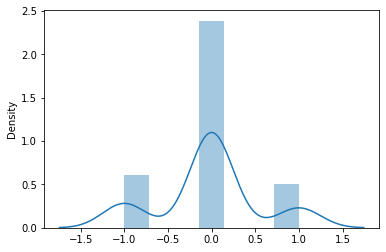

In [85]:
sns.distplot(y_test-y_predxg)

In [86]:
from sklearn.metrics import mean_absolute_error
a = cross_val_score(estimator=xg, X=X_train, y=y_train, cv =10)
print(mean_absolute_error(y_test, y_predxg))
print(a.mean())

0.31746031746031744
0.7264999999999999


In [87]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
rf = RandomForestClassifier(n_estimators=100, criterion="entropy")
rf.fit(X_train, y_train)
y_predrf = rf.predict(X_test) 

In [88]:
rfmean = cross_val_score(estimator=rf, X=X_train, y=y_train, cv =10)
print(mean_absolute_error(y_test, y_predrf))
print(rfmean.mean())

0.30158730158730157
0.7788333333333333


In [89]:
gb = GradientBoostingClassifier(n_estimators = 200, max_depth = 1)
gb.fit(X_train, y_train)
y_predgb = gb.predict(X_test) 

In [90]:
gbmean = cross_val_score(estimator=gb, X=X_train, y=y_train, cv =10)
print(mean_absolute_error(y_test, y_predgb))
print(gbmean.mean())

0.3492063492063492
0.767


In [91]:
ad = AdaBoostClassifier()
ad.fit(X_train, y_train)
y_predad = ad.predict(X_test) 

In [92]:
admean = cross_val_score(estimator=ad, X=X_train, y=y_train, cv =10)
print(mean_absolute_error(y_test, y_predad))
print(admean.mean())

0.25396825396825395
0.6584999999999999


In [93]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [94]:
y_predknn = knn.predict(X_test) 

In [95]:
knnmean = cross_val_score(estimator=knn, X=X_train, y=y_train, cv =10)
print(mean_absolute_error(y_test, y_predknn))
print(knnmean.mean())

0.20634920634920634
0.6948333333333332
